<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%20%EB%B0%A9%EB%B2%95%EB%A1%A0/K_%ED%8F%89%EA%B7%A0_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# CSV 파일 로드
data_csv = pd.read_csv("/content/OnlineRetail.csv",
                       encoding="ISO-8859-1", parse_dates=["InvoiceDate"])

# 데이터의 기본 정보 확인
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
# CustomerID의 결측값 제거
cleaned_data = data_csv.dropna(subset=['CustomerID'])

# 음수값 제거
cleaned_data = cleaned_data[cleaned_data['Quantity']>0]
cleaned_data = cleaned_data[cleaned_data['UnitPrice']>0]

# CustomerID를 정수형으로 변환
cleaned_data['CustomerID'] = cleaned_data['CustomerID'].astype(int)

<ipython-input-3-a8fb2061d5ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['CustomerID'] = cleaned_data['CustomerID'].astype(int)


In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [5]:
cleaned_data['Country'].value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

## RFM 테이블 생성

In [6]:
# RFM 테이블 생성
cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']
current_date = cleaned_data['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm_cleaned = cleaned_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days, # Recency
    'InvoiceNo': 'count', # Frequency
    'TotalPrice': 'sum' # Monetary
}).rename(columns={'InvoiceDate': 'Recency',
                   'InvoiceNo': 'Frequency',
                   'TotalPrice': 'Monetary'})

rfm_cleaned.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


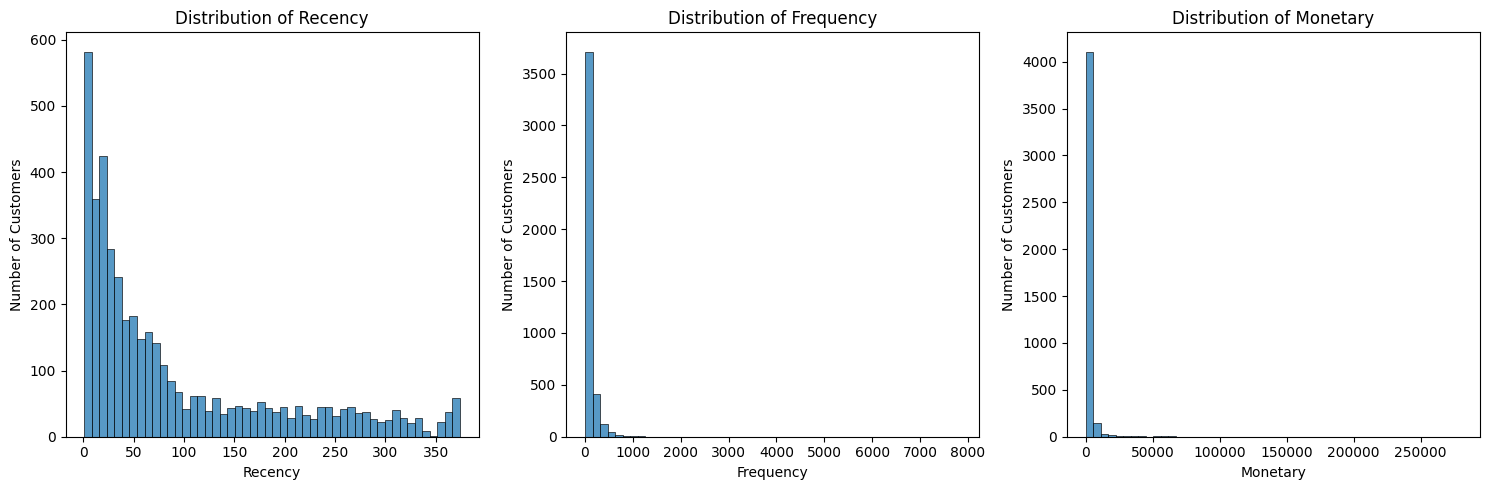

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 변수별 분포 확인
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm_cleaned[column], bins=50)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

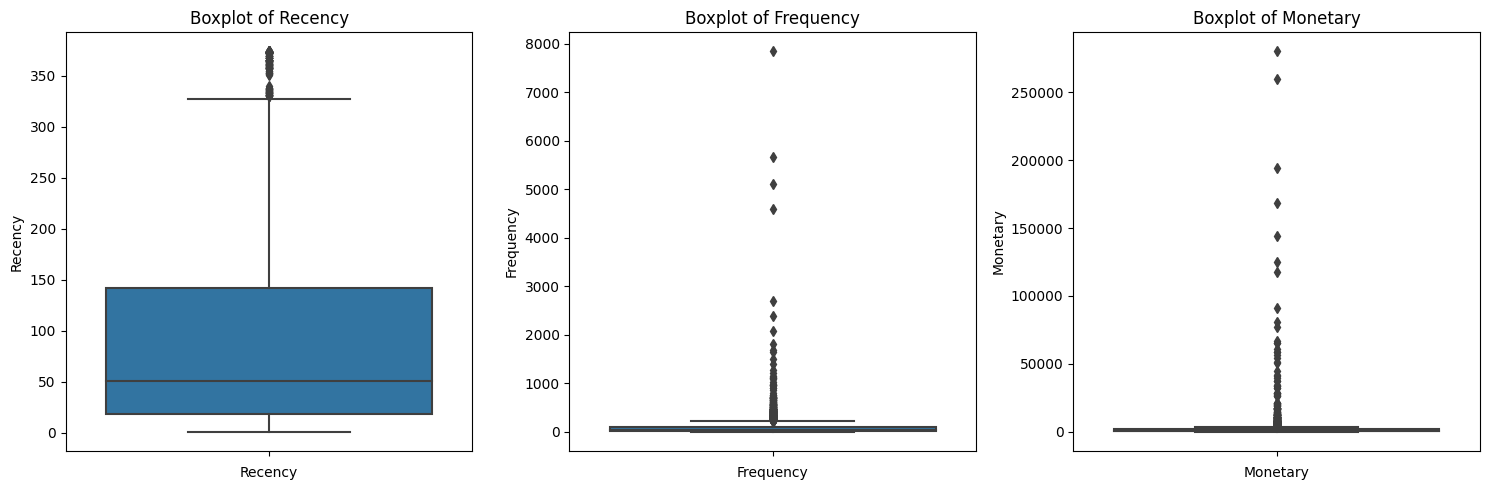

In [8]:
# 각 변수별 박스플롯 그리기
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=rfm_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## 데이터 표준화

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# 데이터 표준화
scaler = StandardScaler()
rfm_standardized = scaler.fit_transform(rfm_cleaned)

# 표준화된 데이터를 DataFrame 형태로 변환
rfm_standardized_df = pd.DataFrame(rfm_standardized, columns=rfm_cleaned.columns, index=rfm_cleaned.index)

rfm_standardized_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2.334574,-0.396578,8.358668
12347,-0.905340,0.394649,0.250966
12348,-0.175360,-0.265435,-0.028596
12349,-0.735345,-0.081836,-0.033012
12350,2.174578,-0.326635,-0.191347


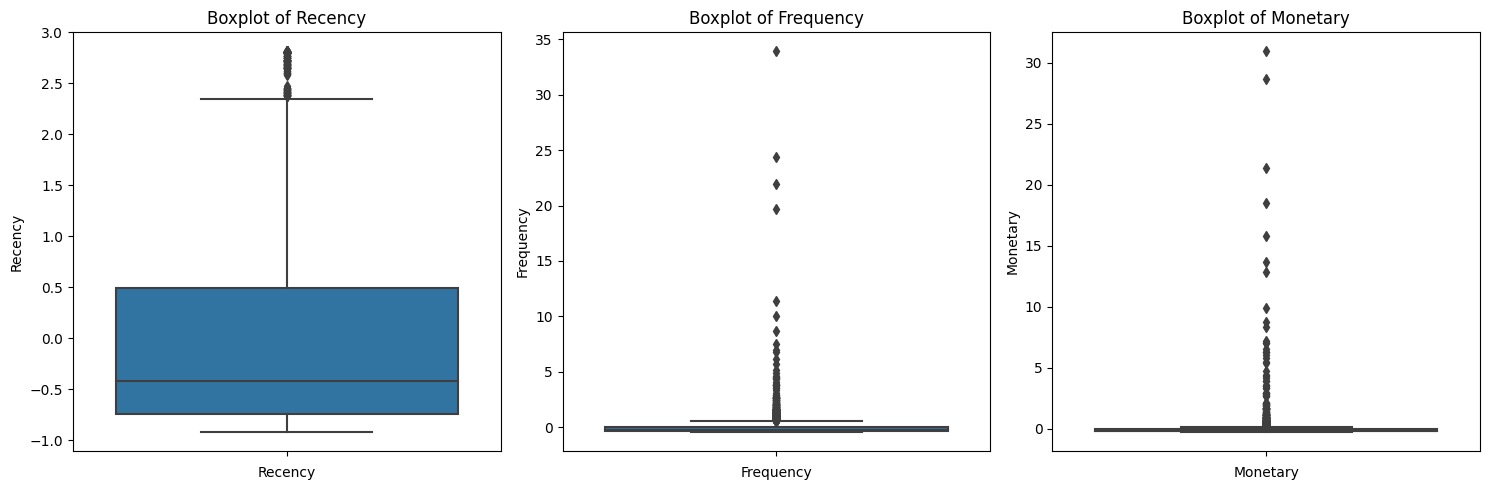

In [11]:
# 각 변수별 박스플롯 그리기
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=rfm_standardized_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

표준화로는 변하지 않았습니다. 로그분석을 사용해보겠습니다.

## 로그 변환

In [12]:
import numpy as np

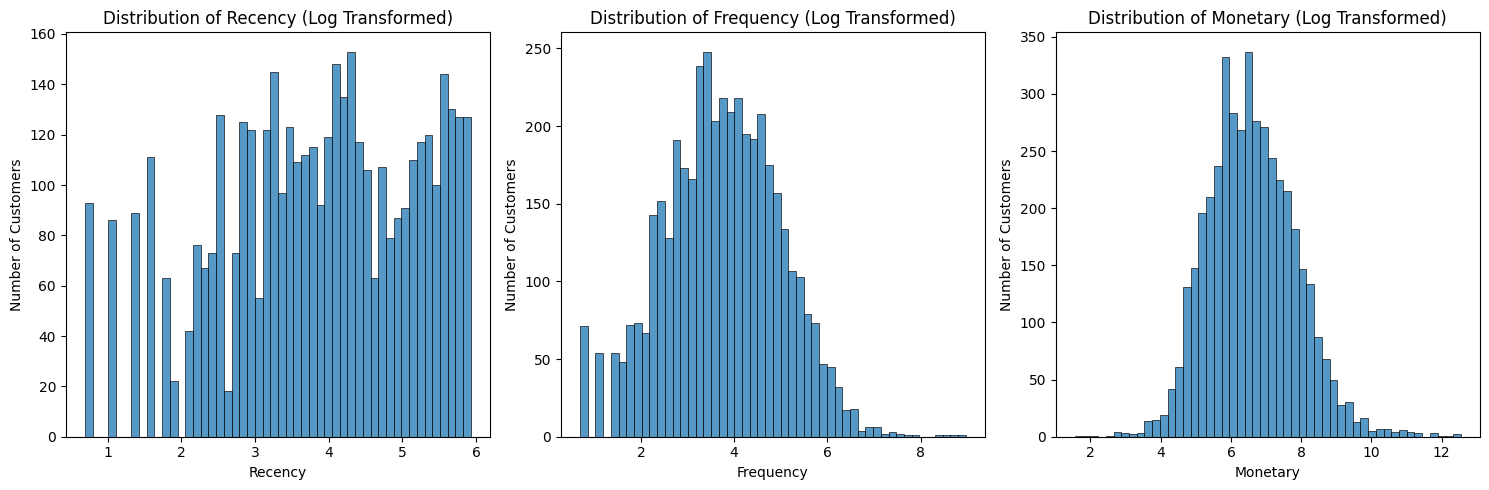

In [13]:
# 로그 변환
rfm_log_transformed = rfm_cleaned.applymap(lambda x: np.log(x+1))

# 로그 변환 후의 분포 확인
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm_log_transformed[column], bins=50)
    plt.title(f'Distribution of {column} (Log Transformed)')
    plt.xlabel(column)
    plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

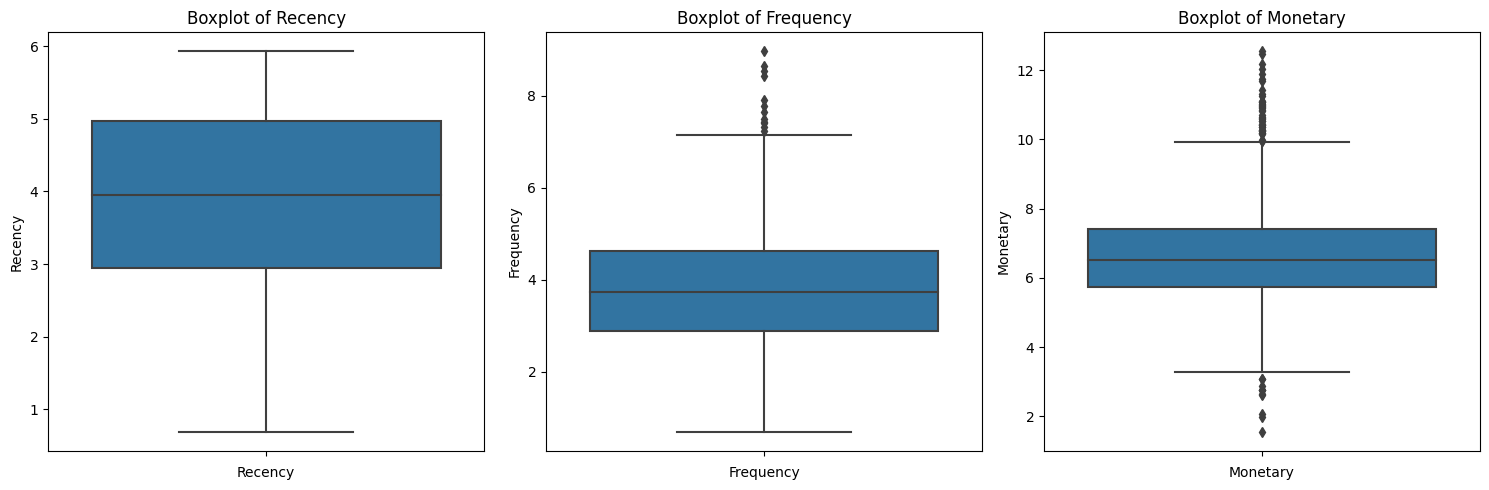

In [14]:
# 각 변수별 박스플롯 그리기
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=rfm_log_transformed[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## 이상치 제거

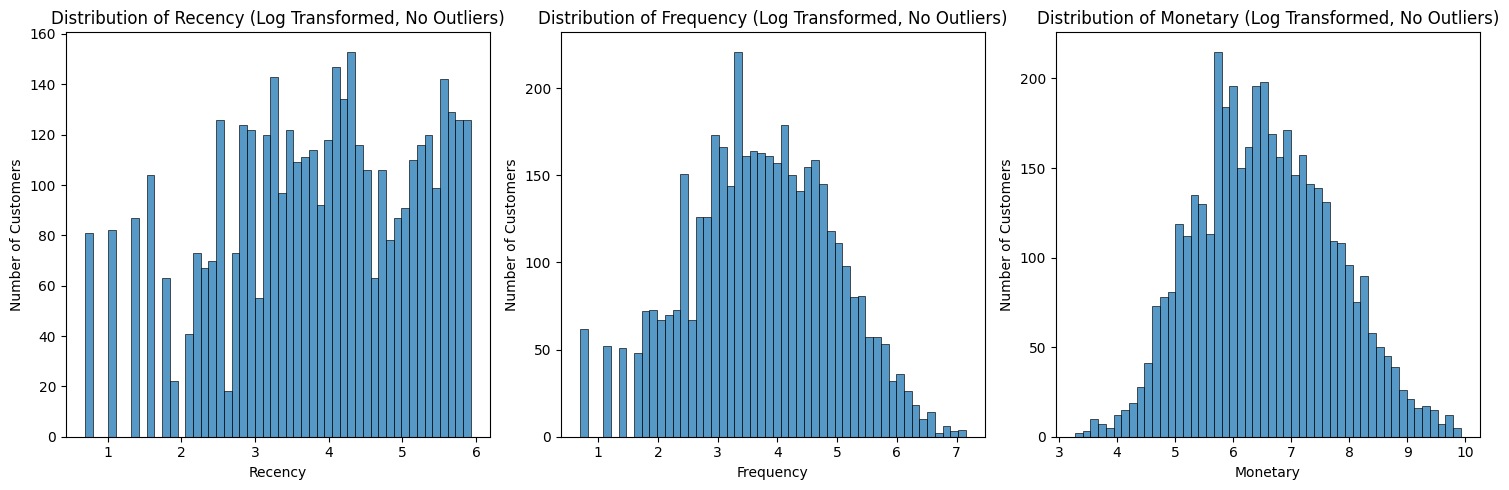

In [15]:
def remove_outliers_iqr(df, column):
    """IQR을 사용하여 DataFrame의 극단치를 제거하는 함수"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df[filter]

# 각 변수별로 극단치 제거
rfm_log_no_outliers = rfm_log_transformed.copy()
for column in ['Recency', 'Frequency', 'Monetary']:
    rfm_log_no_outliers = remove_outliers_iqr(rfm_log_no_outliers, column)

# 극단치 제거 후의 분포 확인
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm_log_no_outliers[column], bins=50)
    plt.title(f'Distribution of {column} (Log Transformed, No Outliers)')
    plt.xlabel(column)
    plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

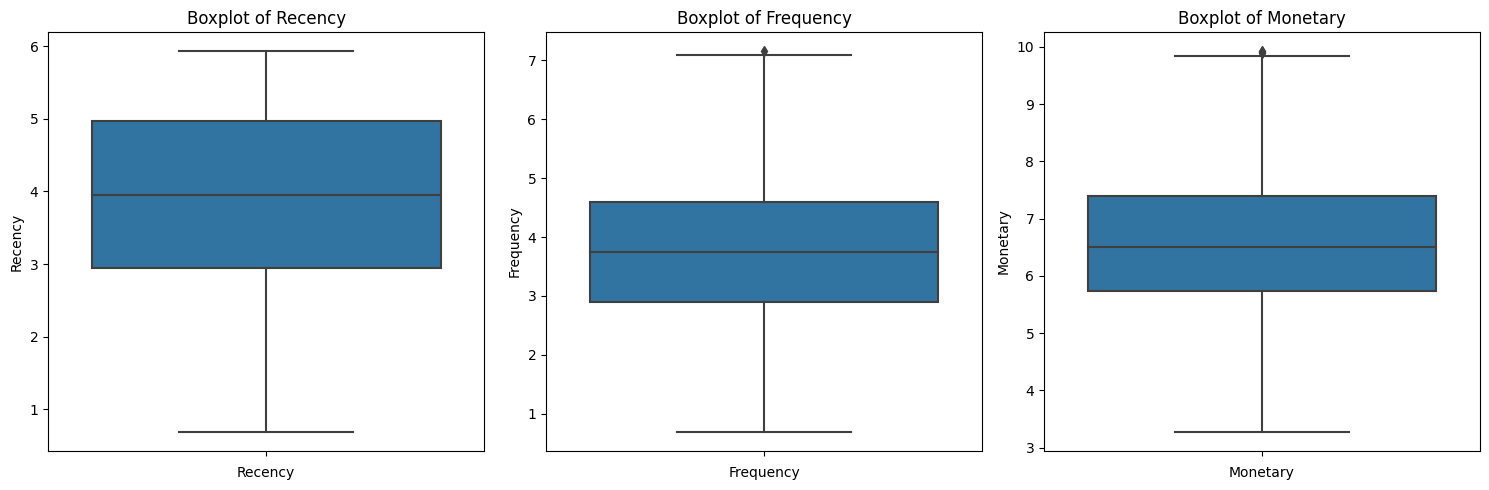

In [16]:
# 각 변수별 박스플롯 그리기
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=rfm_log_no_outliers[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Elbow Method

'Elbow Method'를 사용하여 최적의 군집 수를 탐색하겠습니다.

'Elbow Method'는 클러스터 개수를 늘려가며 `WCSS(Within-Cluster Sum of Squares)` 값을 계산하고 그래프를 그립니다.

WCSS 값이 감소하는 속도가 급격히 줄어드는 지점, 즉 '팔꿈치'처럼 보이는 지점이 최적의 클러스터 개수로 간주됩니다.

In [17]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

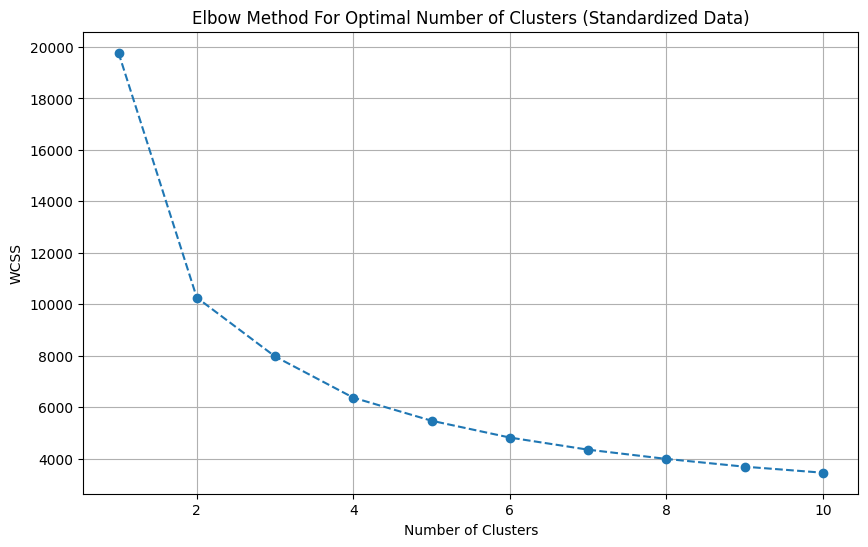

In [18]:
# Elbow Method로 최적의 군집 수 찾기 (1부터 10까지)
wcss_standardized = []
cluster_range_standardized = range(1, 11)

for num_clusters in cluster_range_standardized:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(rfm_log_no_outliers)
    wcss_standardized.append(kmeans.inertia_)

# Elbow 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(cluster_range_standardized, wcss_standardized, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Standardized Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## 실루엣 분석

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# 실루엣 점수 계산 함수
def calculate_silhouette(data, cluster_range):
    silhouette_scores = {}

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores[n_clusters] = silhouette_avg

    return silhouette_scores

# 3, 4, 5, 6 군집으로 K-means 군집화 후 실루엣 점수 계산
clusters_to_evaluate = [3, 4, 5, 6]
silhouette_scores = calculate_silhouette(rfm_log_no_outliers, clusters_to_evaluate)

silhouette_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{3: 0.30051486683339385,
 4: 0.3136053344772045,
 5: 0.2788156952482513,
 6: 0.27830889611568355}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


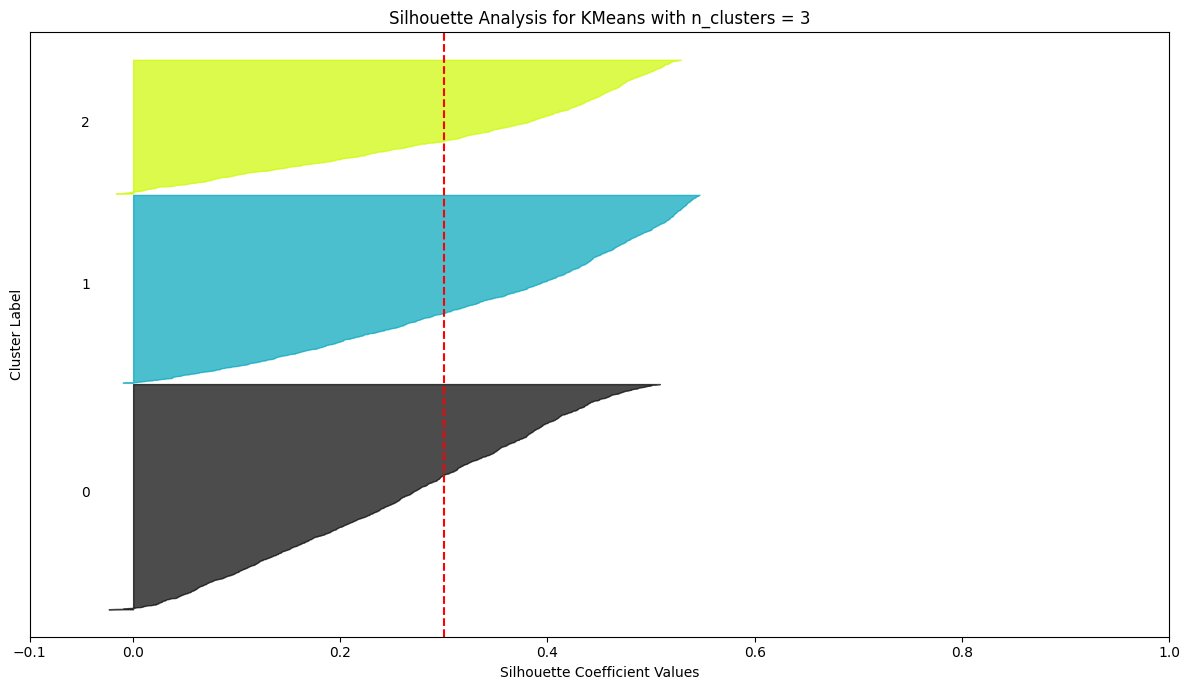

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


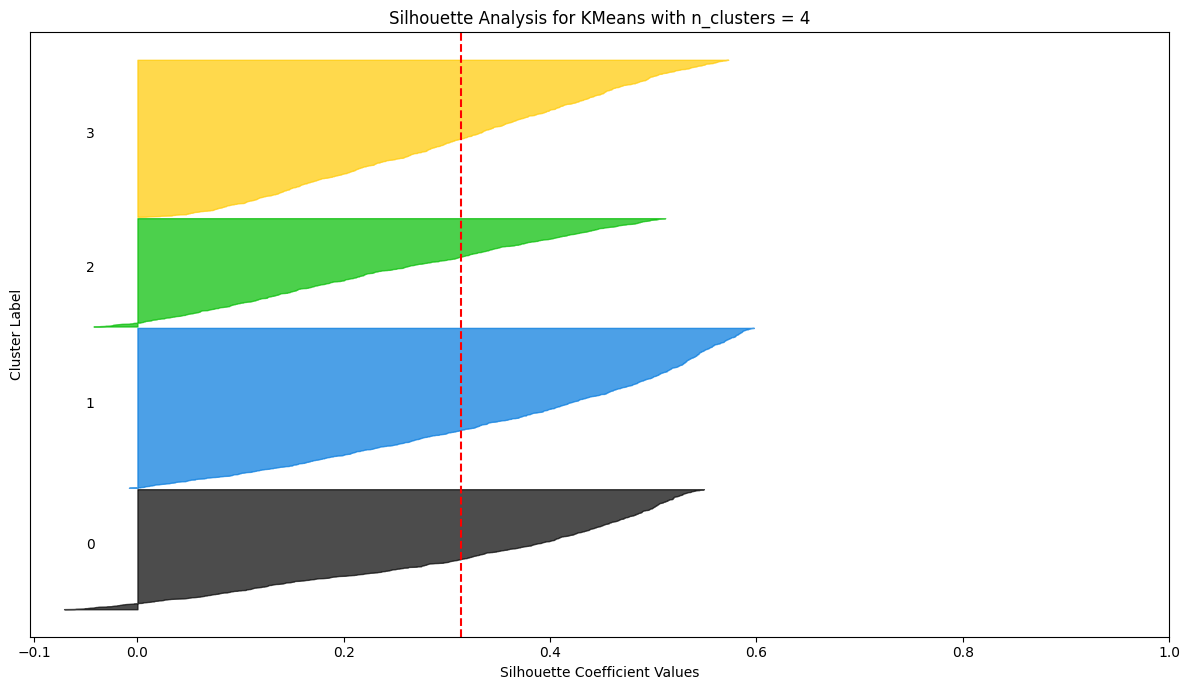

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


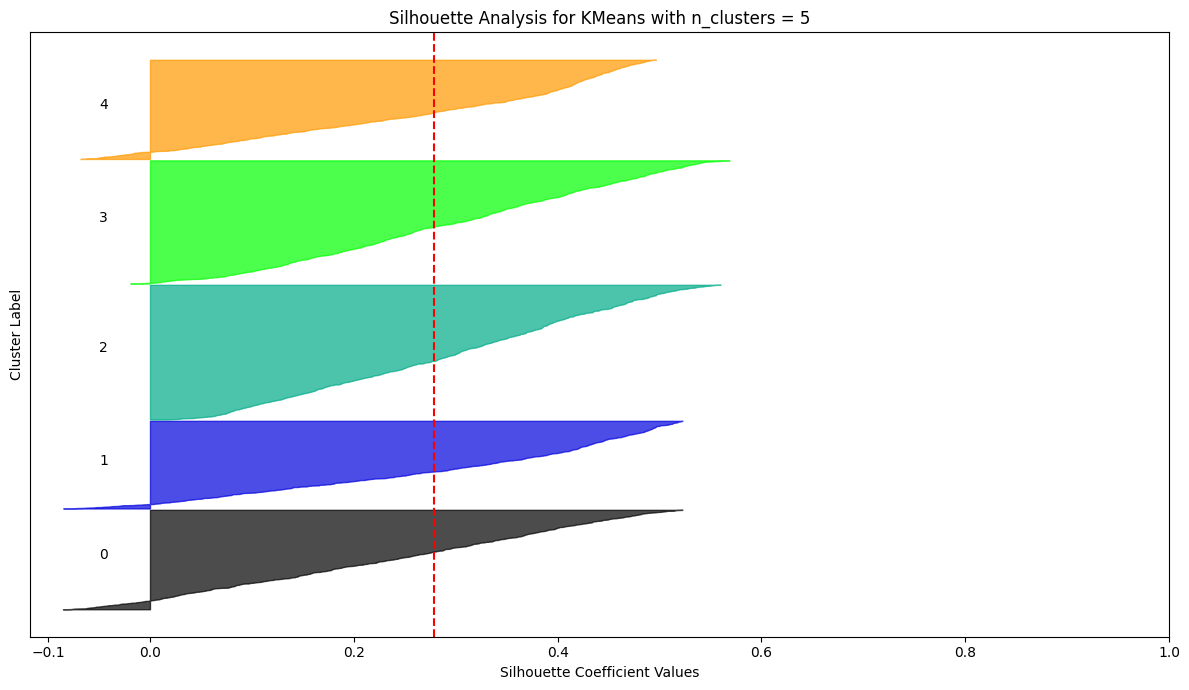

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


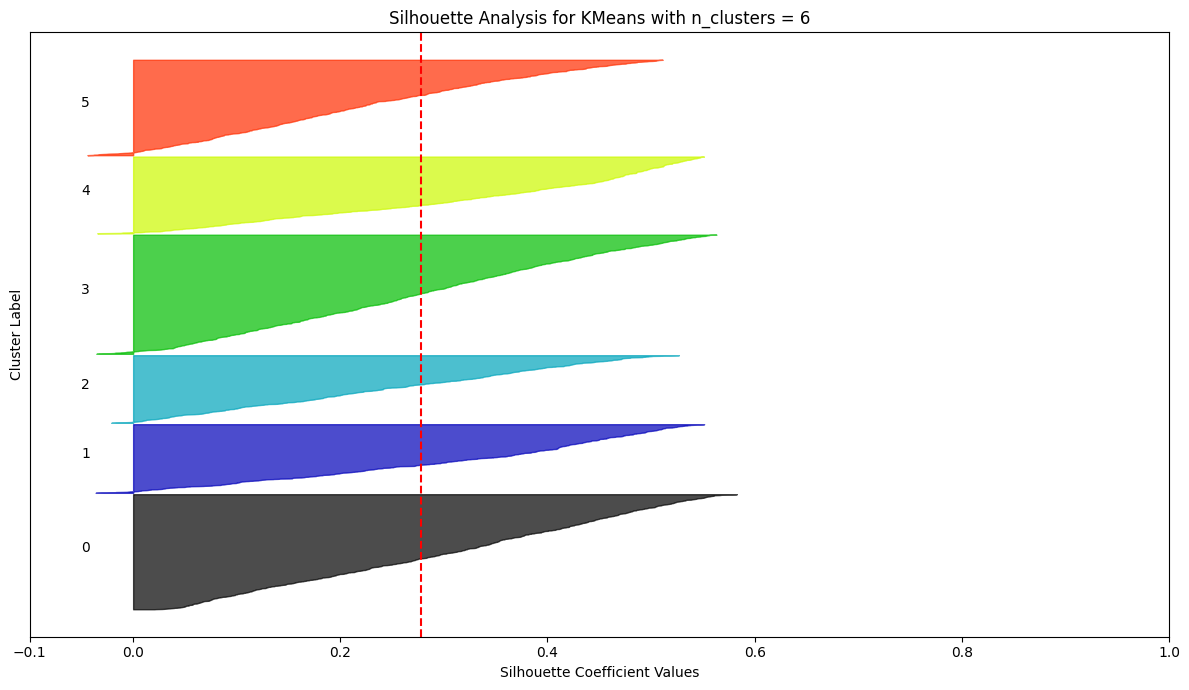

In [20]:
def plot_silhouette(data, n_clusters):
    # 군집화 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)

    # 실루엣 점수와 각 샘플의 실루엣 값 계산
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    y_lower = 10

    # 각 군집에 대한 실루엣 플롯 그리기
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Analysis for KMeans with n_clusters = {n_clusters}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # 실루엣 평균 값에 대한 빨간색 점선 그리기
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.tight_layout()
    plt.show()

# 3, 4, 5, 6 군집에 대한 실루엣 시각화 수행
for n_clusters in clusters_to_evaluate:
    plot_silhouette(rfm_log_no_outliers, n_clusters)

## PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


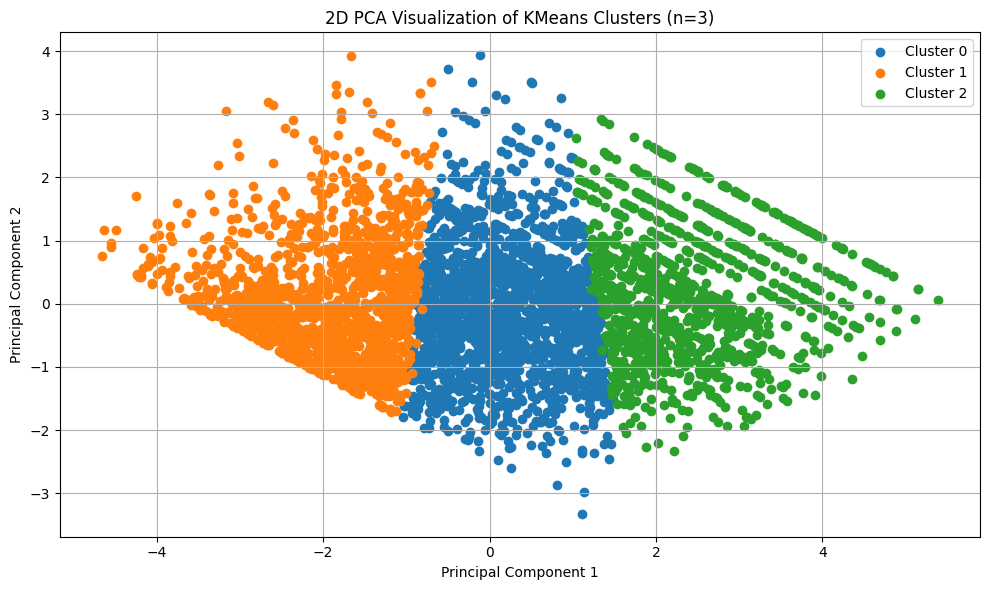

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


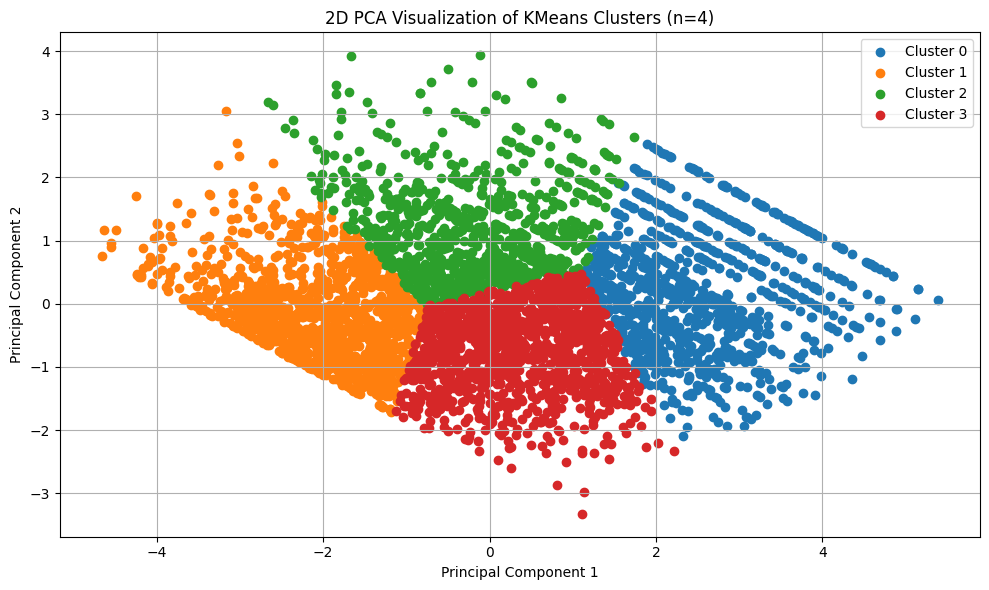

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


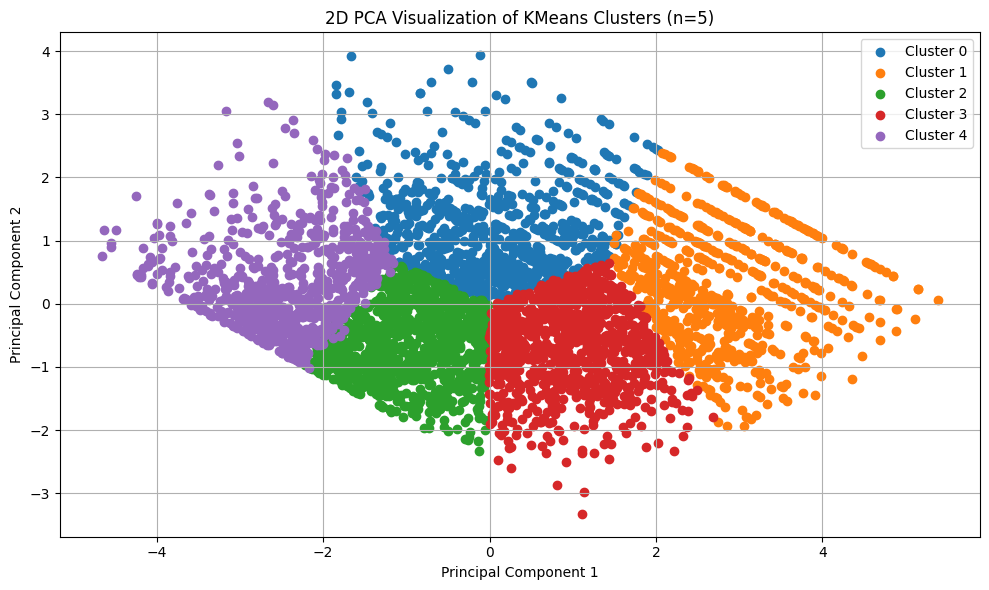

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


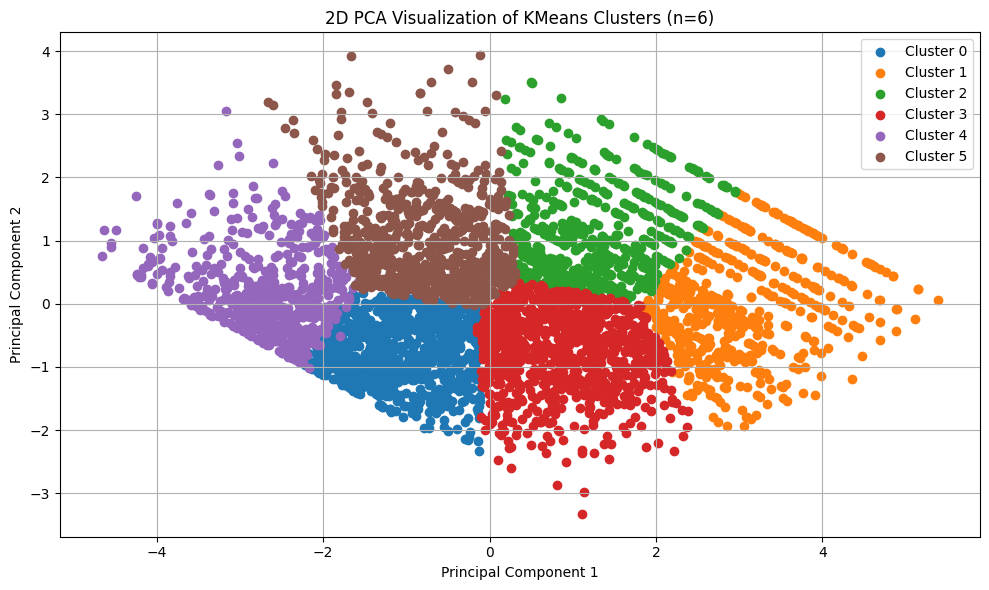

In [28]:
from sklearn.decomposition import PCA

def plot_clusters(data, n_clusters):
    # K-means 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)

    # PCA를 사용하여 데이터를 2D로 축소
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    # 스캐터 플롯으로 데이터 시각화
    plt.figure(figsize=(10, 6))
    for cluster_num in range(n_clusters):
        subset = pca_result[cluster_labels == cluster_num]
        plt.scatter(subset[:, 0], subset[:, 1], label=f"Cluster {cluster_num}")

    plt.title(f"2D PCA Visualization of KMeans Clusters (n={n_clusters})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3, 4, 5, 6 군집에 대해 클러스터 분포 시각화
for n_clusters in clusters_to_evaluate:
    plot_clusters(rfm_log_no_outliers, n_clusters)

In [ ]:
# 군집의 통계적 특성을 다시 확인
cluster_summary_corrected = rfm_log_no_outliers.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max'],
    'Frequency': ['mean', 'std', 'min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max'],
    'Monetary': ['mean', 'std', 'min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max'],
    'Cluster': 'size'
})

# 열 이름을 재설정
cluster_summary_corrected.columns = [
    '_'.join(col).strip().replace('<lambda_0>', '25%').replace('<lambda_1>', '75%')
    for col in cluster_summary_corrected.columns.values
]
cluster_summary_corrected.reset_index(inplace=True)

cluster_summary_corrected

Cluster 0 (High Value Active Customers):

* Recency: 평균적으로 최근 4.26일 전에 구매한 고객들로 구성.
* Frequency: 평균 4.24로 높은 구매 빈도를 보임.
* Monetary: 평균 7.04로 높은 구매 금액을 가짐.
* 전략: 이들은 회사에 가장 가치 있는 고객들로 볼 수 있습니다. 이들에게는 새로운 제품 출시나 특별 프로모션 정보를 우선적으로 전달하며, 리텐션을 위한 전략(예: 로열티 프로그램)을 구상해볼 수 있습니다.

Cluster 1 (Churning Low Value Customers):

* Recency: 평균적으로 5.19일 전에 구매, 가장 오래된 고객군 중 하나.
* Frequency: 평균 2.56으로 낮은 구매 빈도.
* Monetary: 평균 5.50으로 낮은 구매 금액.
* 전략: 이들은 과거에는 구매를 했지만 최근에는 활성화되지 않은 고객군입니다. 이들을 다시 활성화시키기 위한 리-엔게이지먼트 전략(예: 할인 쿠폰, 특별한 제안)을 생각해볼 수 있습니다.

Cluster 2 (New High Value Customers):

* Recency: 평균적으로 2.26일 전에 구매, 가장 최근에 활동한 고객군.
* Frequency: 평균 5.12로 높은 구매 빈도.
* Monetary: 평균 7.95로 매우 높은 구매 금액.
* 전략: 이들은 최근에 회사에 합류하여 높은 금액과 빈도로 구매하는 고객군입니다. 이들에게는 웰컴 패키지나 추가 구매를 유도하는 전략을 세울 수 있습니다.

Cluster 3 (Regular Low Value Customers):

* Recency: 평균적으로 3.03일 전에 구매.
* Frequency: 평균 3.15로 중간 정도의 구매 빈도.
* Monetary: 평균 5.90으로 중간 정도의 구매 금액.
* 전략: 이들은 꾸준히 구매하는 고객군이지만 구매 금액이나 빈도가 높지 않습니다. 이들에게는 추가 구매나 높은 가치의 제품을 구매하도록 유도하는 전략을 생각해볼 수 있습니다.

이러한 방식으로 각 군집의 특성을 확인하고 마케팅 전략을 세울 수 있습니다.